In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format="retina"

In [ ]:
import json
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pygv.viewer import GenomeViewer
from pygv.tracks.bigwig_track import PairedStrandSpecificTracks, BigWigTrack, OverlayingTrack
from pygv.tracks.bed_track import BedTrack, BedPETrack

In [ ]:
sys.path.append("/local/storage/ly349/projects/Deconvolution/Notebooks/")
from customized_styles import _pos_color, _neg_color
from utils import get_bioqueue_file

building of index for /local/storage/ly349/BioQueue/workspace/27/20680v1/results/hepatocyte/Predictions/EnhancerPredictionsFull_threshold0.02_self_promoter.bedpe.gz.pruned.bedpe.gz failed
building of index for /local/storage/ly349/BioQueue/workspace/27/20680v1/results/fibroblast/Predictions/EnhancerPredictionsFull_threshold0.02_self_promoter.bedpe.gz.pruned.bedpe.gz failed
building of index for /local/storage/ly349/BioQueue/workspace/27/20680v1/results/macrophage/Predictions/EnhancerPredictionsFull_threshold0.02_self_promoter.bedpe.gz.pruned.bedpe.gz failed
building of index for /local/storage/ly349/BioQueue/workspace/27/20680v1/results/endothelial-cell/Predictions/EnhancerPredictionsFull_threshold0.02_self_promoter.bedpe.gz.pruned.bedpe.gz failed


array([<Axes: ylabel='Initiation'>, <Axes: ylabel='Histone\nmarks'>,
       <Axes: ylabel='ATAC-seq'>, <Axes: ylabel='E-P'>,
       <Axes: ylabel='Initiation'>, <Axes: ylabel='Histone\nmarks'>,
       <Axes: ylabel='ATAC-seq'>, <Axes: ylabel='E-P'>,
       <Axes: ylabel='Initiation'>, <Axes: ylabel='Histone\nmarks'>,
       <Axes: ylabel='ATAC-seq'>, <Axes: ylabel='E-P'>,
       <Axes: ylabel='Initiation'>, <Axes: ylabel='Histone\nmarks'>,
       <Axes: ylabel='ATAC-seq'>, <Axes: ylabel='E-P'>,
       <Axes: ylabel='RefSeq'>], dtype=object)

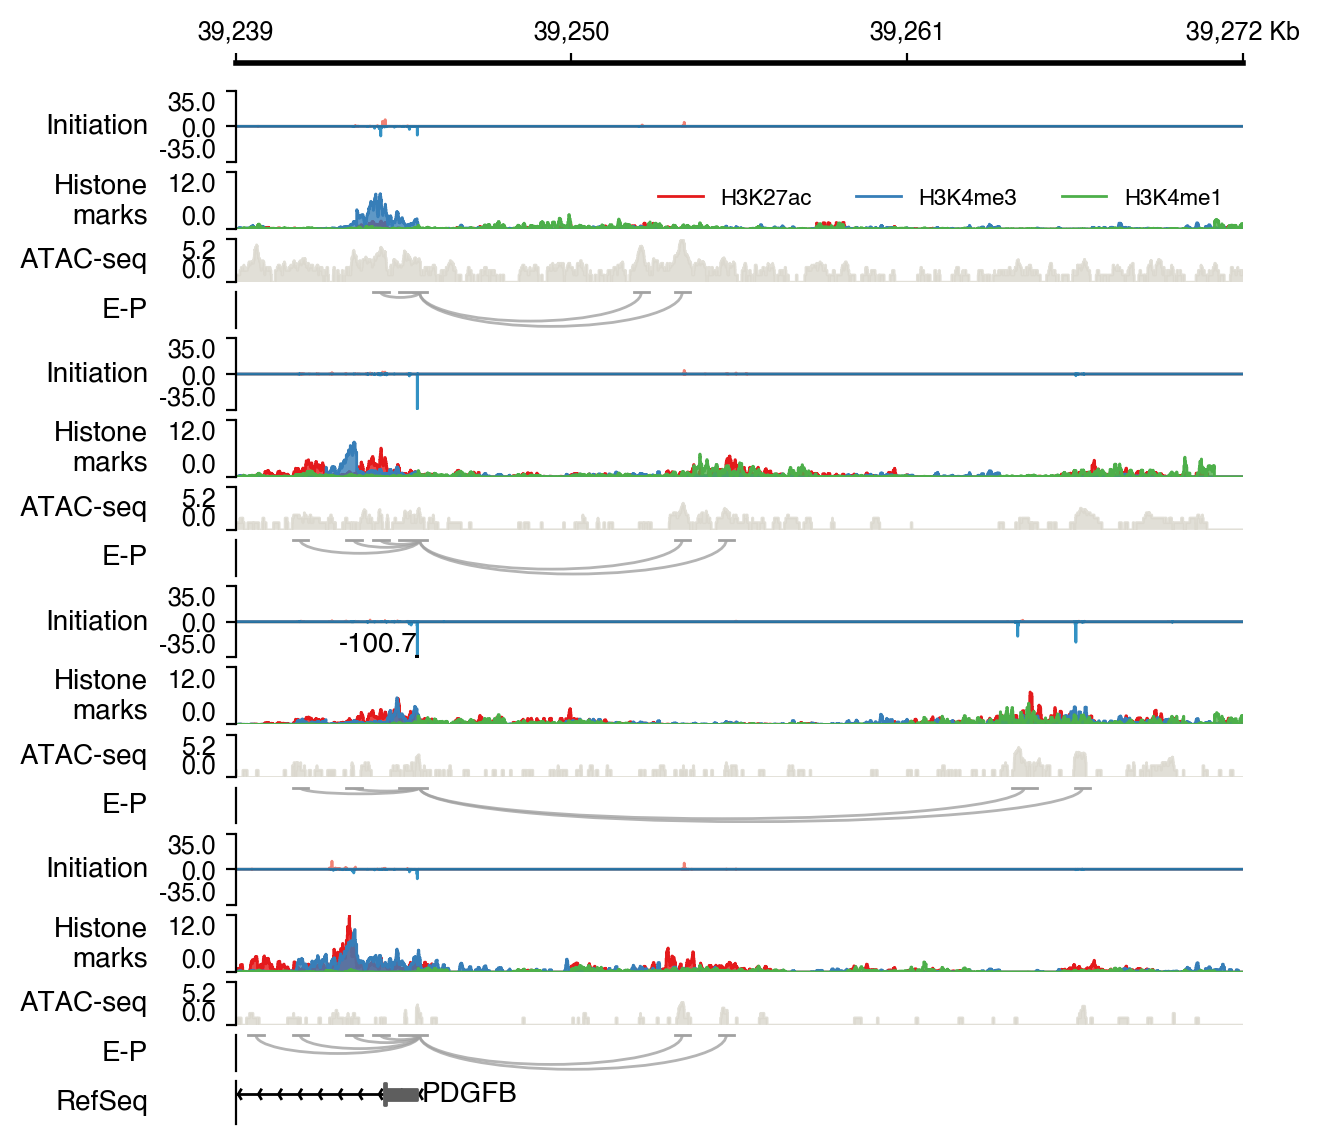

In [ ]:
gv = GenomeViewer(inward_ticks=True, n_ticks=4)
gv_obj = gv
_cell_labels = ("hepatocyte", "fibroblast", "macrophage", "endothelial cell")

for i, label in enumerate(_cell_labels):
    safe_label = label.replace(" ", "-")
    _pred = PairedStrandSpecificTracks(
        get_bioqueue_file("{{History:18338-%s.pl.bw}}" % safe_label),
        get_bioqueue_file("{{History:18338-%s.mn.bw}}" % safe_label),
        name="Initiation", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", 
        min_val=-35, max_val=35
    )
    gv_obj.add_track(_pred)

    hist_pred = OverlayingTrack(
        (
            get_bioqueue_file("{{History:20301-%s.pl.bw}}" % safe_label),
            get_bioqueue_file("{{History:20659-%s.pl.bw}}" % safe_label),
            get_bioqueue_file("{{History:20322-%s.pl.bw}}" % safe_label),
        ), ("H3K27ac", "H3K4me3", "H3K4me1"), y_tick_format="{:0.1f}", height=0.8,
        legend=False if i > 0 else True, legend_kws={"ncols": 3}
    )
    hist_pred.name = "Histone\nmarks"
    gv_obj.add_track(hist_pred)
    
    acc = BigWigTrack(
        get_bioqueue_file("{{History:18311-%s.fragments.bw}}" % safe_label),
        name="ATAC-seq", color="#dad7cd", y_tick_format="{:0.1f}", height=0.6)
    acc.data_transform = "asinh"
    gv_obj.add_track(acc)

    pe = BedPETrack(
        get_bioqueue_file("{{History:20680-results/%s/Predictions/EnhancerPredictionsFull_threshold0.02_self_promoter.bedpe.gz.pruned.bedpe.gz}}" % safe_label),
        height=0.5, name="E-P", flip=True
    )
    gv_obj.add_track(pe)

annot = BedTrack(
    "/local/storage/ly349/projects/Deconvolution/Data/Refs/ncbi_refseq.ucsc020724.longest.bed.gz", 
    height=0.3, show_name=True, name="RefSeq")
annot.edge_color = "#5E5E5E"
annot.color = "#5E5E5E"
annot.allowed_feature_lanes = 1
gv_obj.add_track(annot)

gv_obj.add_group_autoscale([0, 4, 8, 12])
gv_obj.add_group_autoscale([1, 5, 9, 13])
gv_obj.add_group_autoscale([2, 6, 10, 14])
gv.plot("chr22", 39239045, 39271933, fig_width=6.5, height_scale_factor=0.55, hide_chromosome_name=True)

building of index for /local/storage/ly349/BioQueue/workspace/27/18205v4/results/bulk/Predictions/EnhancerPredictionsFull_threshold0.02_self_promoter.bedpe.gz failed


array([<Axes: ylabel='Initiation'>, <Axes: ylabel='Histone\nmarks'>,
       <Axes: ylabel='ATAC-seq'>, <Axes: ylabel='E-P'>,
       <Axes: ylabel='RefSeq'>], dtype=object)

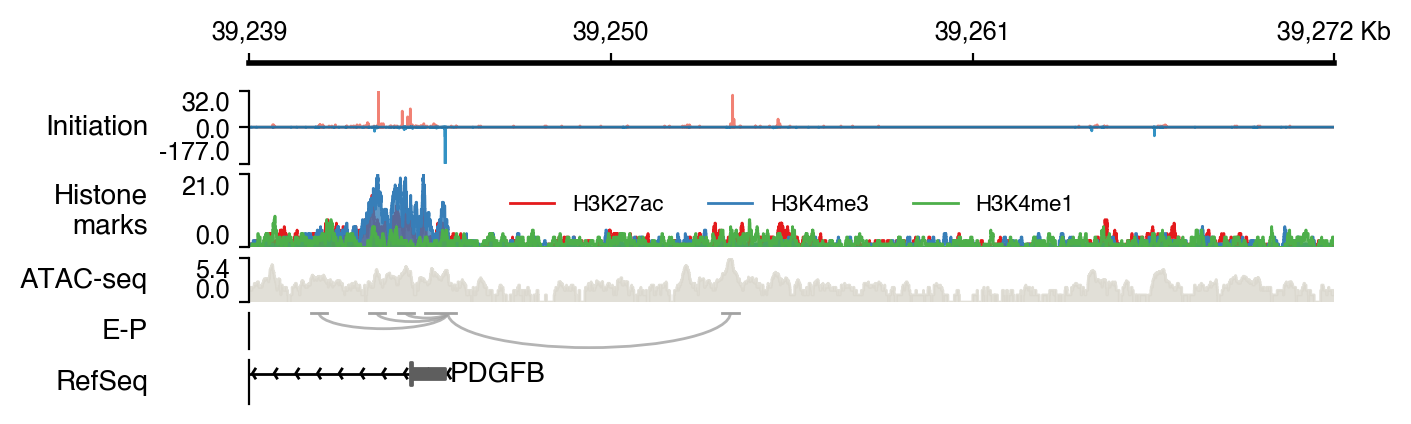

In [ ]:
gv = GenomeViewer(inward_ticks=True, n_ticks=4)
gv_obj = gv

_pred = PairedStrandSpecificTracks(
        get_bioqueue_file("{{History:14141-RtLbLiver_EN8_PROcap_hg38_alignments_merged_pl.bw}}"),
        get_bioqueue_file("{{History:14141-RtLbLiver_EN8_PROcap_hg38_alignments_merged_mn.bw}}"),
        name=f"Initiation", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", 
    )
gv_obj.add_track(_pred)

hist_act = OverlayingTrack(
        (
            get_bioqueue_file("{{History:17816-out.bw}}"),
            get_bioqueue_file("{{History:17810-out.bw}}"),
            get_bioqueue_file("{{History:17837-out.bw}}"),
        ), ("H3K27ac", "H3K4me3", "H3K4me1"), y_tick_format="{:0.1f}", height=1.,
    legend_kws={"ncols": 3}
    )
hist_act.name = f"Histone\nmarks"
gv_obj.add_track(hist_act)

acc = BigWigTrack(get_bioqueue_file("{{History:17816-bulk.fragments.bw}}"), 
                      name="ATAC-seq", color="#dad7cd", y_tick_format="{:0.1f}", height=0.6)
acc.data_transform = "asinh"
gv_obj.add_track(acc)

# full-avgHiC
pe = BedPETrack(
    get_bioqueue_file("{{History:18205-results/bulk/Predictions/EnhancerPredictionsFull_threshold0.02_self_promoter.bedpe.gz}}"),
    height=0.5, name="E-P", flip=True
)
gv_obj.add_track(pe)

annot = BedTrack(
    "/local/storage/ly349/projects/Deconvolution/Data/Refs/ncbi_refseq.ucsc020724.longest.bed.gz", 
    height=0.3, show_name=True, name="RefSeq")
annot.bed_obj
# annot.block_line_width = 0
annot.edge_color = "#5E5E5E"
annot.color = "#5E5E5E"
annot.allowed_feature_lanes = 1
gv_obj.add_track(annot)

gv.plot("chr22", 39239045, 39271933, fig_width=7, height_scale_factor=0.55, hide_chromosome_name=True)

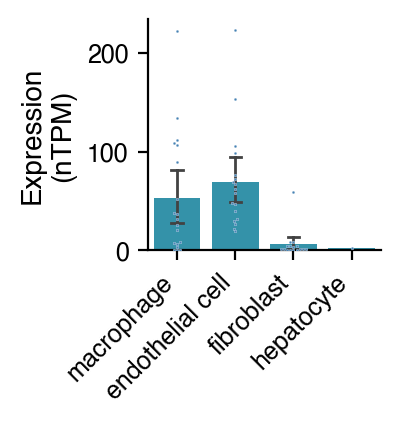

In [6]:
pdgfb_df = pd.read_csv("../../Data/Datasets/RNAseq/PDGFB.tsv", sep="\t")
fig, ax = plt.subplots(figsize=(1.5, 1.5))
sns.barplot(x="Cell type", y="Expression (nTPM)", 
            data=pdgfb_df, linewidth=1, color="#219ebc",
            err_kws={"linewidth": 1, }, capsize=.2,
            # order=("endothelial cell", "fibroblast", "hepatocyte", "macrophage"), 
               # ax=ax, saturation=1.
              )
sns.swarmplot(x="Cell type", y="Expression (nTPM)", data=pdgfb_df, size=1, color="steelblue", edgecolor="white", linewidth=0.1)
ax.set_xlabel("")
ax.set_ylabel("Expression\n(nTPM)")
plt.xticks(rotation=45, ha="right")
sns.despine()

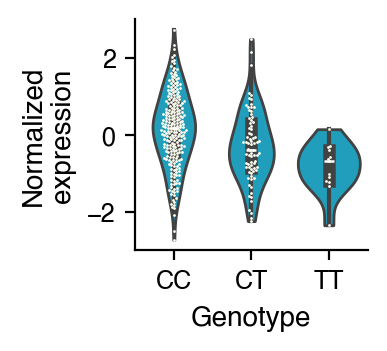

In [7]:
with open("../../Data/Datasets/eQTL/GTEx_rs5757584_ENSG00000100311.json") as fh:
    _jo = json.load(fh)
    genotype_exp = pd.DataFrame({"genotype": _jo["genotypes"], "Normalized expression": _jo["data"]})
genotype_exp.replace({0: "CC", 1: "CT", 2: "TT"}, inplace=True)

fig, ax = plt.subplots(figsize=(1.5, 1.5))
sns.violinplot(x="genotype", y="Normalized expression", 
               data=genotype_exp, cut=0, linewidth=1, color="#219ebc",
               order=("CC", "CT", "TT"), ax=ax, saturation=1.
              )
sns.swarmplot(x="genotype", y="Normalized expression", 
               data=genotype_exp, linewidth=0, edgecolor=None, color="#FFFFF2",
               order=("CC", "CT", "TT"), ax=ax, s=1, 
              )
ax.set_xlabel("Genotype")
ax.set_ylabel("Normalized\nexpression")
sns.despine()